<center>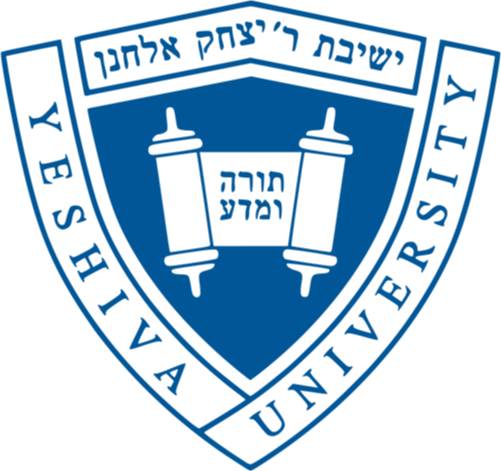</center>

# <center>Katz School of Science and Health</center>
# <center>AIM 5004 Predictive Models</center>
<p>

# <center>Homework 02</center>
<br><br>

### <center>Radek Jan Holik</center>
<br>
<br>

# Assignment

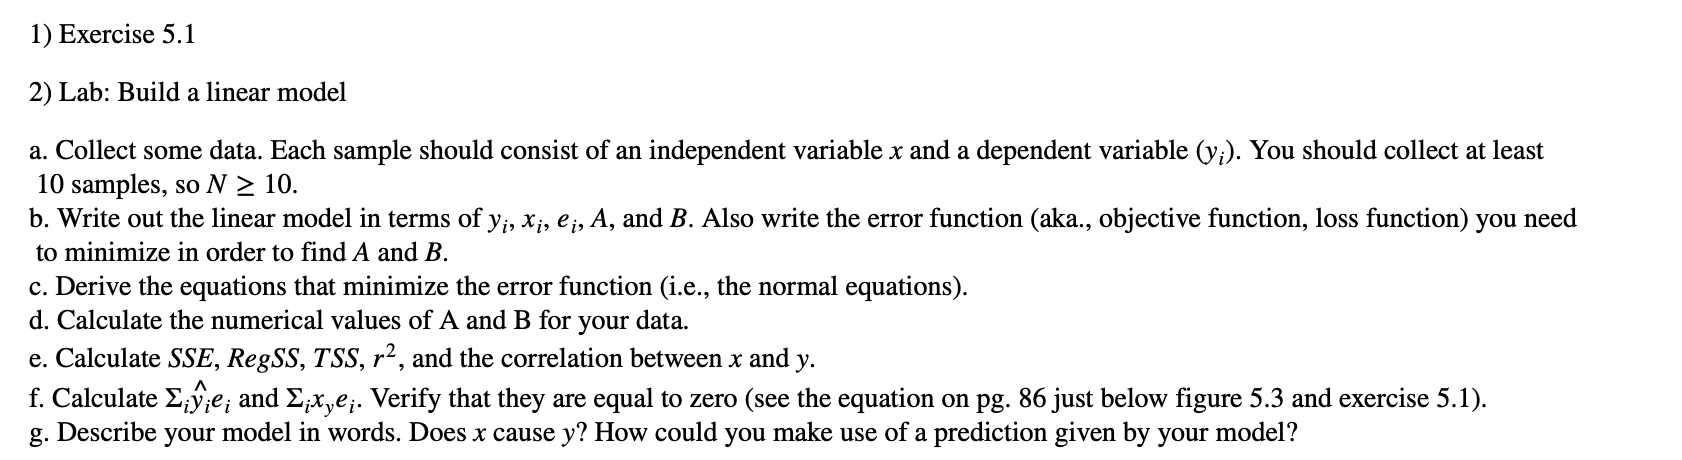

# Task #1
### Exercise 5.1. (from Fox 2016) *Prove that the least-squares fit in simple-regression analysis has the following properties:

### <b>(a)</b> $\sum \widehat{y}_i e_i = 0$.

The following applies:

$$\sum \widehat{y}_i e_i = \sum(A + B x_i) e_i = A \sum e_i + B \sum x_i e_i$$

#### <b>I.<b> $A\sum e_i$

$\sum e_i = \sum (y_i - \widehat{y}_i) = \sum ( y_i  - (A + Bx_i)  ) = \sum y_i - B \sum x_i - An$

Now the first of the normal equations is applied, $An + B \sum x_i = \sum y_i$:

$-B \sum x_i - A n = - \sum y_i$

Then:

$ \sum y_i - \sum y_i = 0$

$$A\sum e_i = 0$$

#### <b>II.<b> $B\sum x_i e_i$

$\sum x_i e_i = \sum x_i(y_i - \widehat{y}_i) = \sum x_i( y_i  - (A + Bx_i)  ) = \sum x_i y_i - A \sum x_i - B \sum x^2_i$

Now the second of the normal equations is applied, $A \sum x_i + B \sum x^2_i = \sum x_i y_i$:

$- A \sum x_i - B \sum x^2_i = - \sum x_i y_i$

Then:

$ \sum x_i y_i - \sum x_i y_i = 0$

$$B \sum x_i e_i = 0$$

When applying the result from I. and II., the following statement applies:

#### $$\sum \widehat{y}_i e_i = \sum(A + B x_i) e_i = A \sum e_i + B \sum x_i e_i = 0 + 0 = 0$$

### <b>(b)</b> $\sum (y_i - \widehat{y}_i)(\widehat{y}_i - \overline{y}) = \sum e_i (\widehat{y}_i - \overline{y}) = 0$.

The following equality is used:

$e_i = y_i - \widehat{y}_i$

Then:

$\sum (y_i - \widehat{y}_i)(\widehat{y}_i - \overline{y}) = \sum e_i (\widehat{y}_i - \overline{y}) =\sum e_i \widehat{y}_i - \overline{y} \sum e_i$

The validity of the statements from (a), i.e.: $\sum e_i \widehat{y}_i = 0$ and $\overline{y} \sum e_i = 0$.

#### $$\sum (y_i - \widehat{y}_i)(\widehat{y}_i - \overline{y}) = \sum e_i (\widehat{y}_i - \overline{y}) =\sum e_i \widehat{y}_i - \overline{y} \sum e_i = 0 - 0 = 0$$

# Task #2
### Lab: Build a linear model

#### <b>(a)</b> Collect some data. Each sample should consist of an independent variable $x$ and a dependent variable ($y_i$). You should collect at least 10 samples, so $N \geq 10$.

#### Importing the necessary libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

For the purpose of this task, data on world production of oil and NGL (million tons) from 1971 to 2020 was used.

This is the source of the data used:<br>
IEA. Licence: CC BY 4.0 This data is subject to the IEA's terms and conditions.<br>
https://www.iea.org/data-and-statistics/charts/world-oil-supply-and-demand-1971-2020

In [34]:
df = pd.read_csv("./data/world-oil-supply-and-demand-1971-2020.csv")

In [35]:
# Data head
df.head()

,Year,Crude oil and NGL production
0,1971,2490.52
1,1972,2633.79
2,1973,2870.44
3,1974,2875.22
4,1975,2739.90


This data contains 50 observations.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          50 non-null     int64  
 1   Crude oil and NGL production  50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


In [37]:
# Conversion to Numpy
x = df[list(df.columns)[0]].to_numpy(dtype=np.float64) # independent variable
y = df[list(df.columns)[1]].to_numpy(dtype=np.float64) # dependent variable
N = len(x) # number of observations

In [38]:
print(f"N = {N}")

N = 50


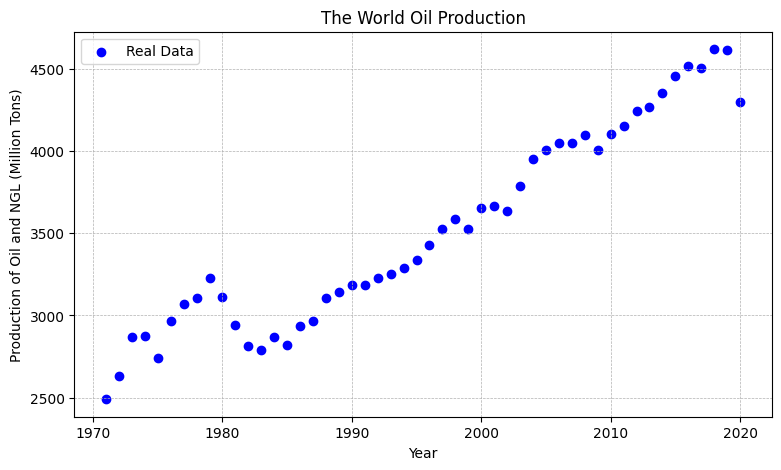

In [39]:
# Plot of the data and the corresponding Regression line
plt.figure(figsize = (9, 5))
plt.scatter(x, y, c='b', marker='o')  
plt.title('The World Oil Production')
plt.legend(["Real Data"])
plt.xlabel('Year')
plt.ylabel('Production of Oil and NGL (Million Tons)')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

#### <b>(b)</b> Write out the linear model in terms of $y_i$, $x_i$, $e_i$, $A$, and $B$. Also write the error function (aka., objective function, loss function) you need to minimize in order to find $A$ and $B$.

Linear regression model:

### $$y_i = A + B x_i + e_i, \hspace{1em} i = 1, 2, \ldots , n \hspace{1em}$$

Where

$ \mathbb{E}[e_i] = 0 $

With prediction (the fitted value):

### $$\widehat{y}_i = A + B x_i$$

In [40]:
def Prediction(x, A, B):
    '''
        Prediction of Linear regression model:
        ^yi = A + B * xi 
    '''

    yhat = A + B * x
    
    return yhat

Where

### $$A = \frac{\sum^n_i y_i}{n}  - B \frac{\sum^n_i x_i}{n}  = \overline{y} - B \overline{x}$$
### $$B = \frac{n \sum^n_i x_i y_i - \sum^n_i x_i \sum^n_i y_i}{n \sum^n_i x^2_i - (\sum^n_i x_i)^2} = \frac{\sum^n_i (x_i - \overline{x})(y_i - \overline{y})}{\sum^n_i (x_i - \overline{x})^2}$$

In [41]:
def getParameters(x, y):
    '''
        Calculates parameters A and B for a linear regression model:
        ^yi = A + B * xi 
    '''
    
    meanX = np.mean(x)
    meanY = np.mean(y)
    xm = x - meanX
    ym = y - meanY
    CovXY = np.sum(xm*ym)/N
    VarXX = np.sum(xm**2)/N

    B = CovXY / VarXX
    A = meanY - B * meanX

    return A, B

Loss function to minimize:

### $$S(A, B) = \sum^n_{i=1} e^2_i = \sum^n_{i=1} (y_i - \widehat{y}_i)^2 = \sum^n_{i=1} (y_i - A - B x_i)^2$$

In [42]:
def Loss(y, yhat):
    '''
        Loss/Cost function:
        S(y, ^y) = Σ (y - ^y)² = Σ e²
    '''

    e = y - yhat
    
    return e.T @ e

#### <b>(c)</b> Derive the equations that minimize the error function (i.e., the normal equations).

First step is to find $\frac{\partial S(A,B)}{\partial A} = 0$ and $\frac{\partial S(A,B)}{\partial b} = 0$.

$\frac{\partial S(A,B)}{\partial A} = \frac{\partial \sum^n_i e^2_i}{\partial A} = \frac{\partial \sum^n_i (y_i - \widehat{y}_i)^2}{\partial A} = \frac{\partial \sum^n_i (y_i - A - B x_i)^2}{\partial A} = \sum^n_i 2 (y_i - A - B x_i)(-1) = -2(\sum^n_i y_i - \sum^n_i A - B \sum^n_i x_i)$

$\frac{\partial S(A,B)}{\partial B} = \frac{\partial \sum^n_i e^2_i}{\partial B} = \frac{\partial \sum^n_i (y_i - \widehat{y}_i)^2}{\partial B} = \frac{\partial \sum^n_i (y_i - A - B x_i)^2}{\partial B} = \sum^n_i 2 (y_i - A - B x_i)(-x_i) = -2(\sum^n_i x_i y_i - A \sum^n_i x_i - B \sum^n_i x^2_i)$

The given derivatives are equal to zero, thus the following equations are obtained. This system of equations is so-called __<i>normal equations</i>__.

### $$\begin{array}{lcl} An & + & B \sum^n_i x_i & = &\sum^n_i y_i \\ A \sum^n_i x_i & + & B \sum^n_i x^2_i & = & \sum^n_i x_i y_i \end{array}$$

The first equation is divided by n, and the B term is subtracted.

### $$A = \frac{1}{n} \sum^n_{i=1} y_i - B \frac{1}{n} \sum^n_{i=1} x_i = \overline{y} - B \overline{x}$$

Now A is inserted into the second equation.

$(\overline{y} - B \overline{x}) \sum x_i + B \sum x^2_i = \sum x_i y_i \Rightarrow \overline{y} \sum x_i - B \overline{x} \sum x_i + B \sum x^2_i = \sum x_i y_i \Rightarrow B (\sum x^2_i - \overline{x} \sum x_i) = \sum x_i y_i - \overline{y} \sum x_i$

B is expressed from the last term.

$B = \frac{\sum x_i y_i - \overline{y} \sum x_i}{\sum x^2_i - \overline{x} \sum x_i}  = \frac{\sum x_i y_i - \frac{1}{n} \sum y_i \sum x_i}{\sum x^2_i - \frac{1}{n} \sum x_i \sum x_i} = \frac{\frac{1}{n}(n \sum x_i y_i -  \sum y_i \sum x_i)}{\frac{1}{n}( n \sum x^2_i -  \sum x_i \sum x_i)} = \frac{n \sum x_i y_i - \sum y_i \sum x_i}{ n \sum x^2_i - (\sum x_i)^2}$

The last term is covariance over variance.

### $$ B = \frac{n \sum^n_i x_i y_i - \sum^n_i y_i \sum^n_i x_i}{ n \sum^n_i x^2_i - (\sum^n_i x_i)^2} = \frac{\sum^n_i (x_i - \overline{x})(y_i - \overline{y})}{\sum^n_i (x_i - \overline{x})^2}$$

The equations that minimize the error function were thus derived.

#### <b>(d)</b> Calculate the numerical values of A and B for your data.

In [43]:
A, B = getParameters(x, y)
print(f"A = {A}\nB = {B}")

A = -76449.75458583432
B = 40.07562545018007


### $$A = -76449.75458583432 \hspace{3em} B = 40.07562545018007$$

#### <b>(e)</b> Calculate $SSE$, $RegSS$, $TSS$, $r^2$, and the correlation between $x$ and $y$.

In [44]:
yhat = Prediction(x, A, B)
eps = y - yhat
SSE = eps.T @ eps
RSS = SSE
meanX = np.mean(x)
meanY = np.mean(y)
xm = x - meanX
ym = y - meanY
CovXY = np.sum(xm*ym)/N
TSS = ym.T @ ym
RegSS = TSS - RSS
r2 = RegSS / TSS
corr = CovXY*N/np.sqrt((xm.T @ xm) * (ym.T @ ym))

In [45]:
print(f"SSE = {SSE}")
print(f"RegSS = {RegSS}")
print(f"TSS = {TSS}")
print(f"r² = {r2}")
print(f"corr(x,y) = {corr}")

SSE = 1268215.93473926
RegSS = 16723055.551260741
TSS = 17991271.486
r² = 0.9295093770484133
corr(x,y) = 0.9641106663907487


### $$SSE = 1268215.93473926$$
### $$RegSS = 16723055.551260741$$
### $$TSS = 17991271.486$$
### $$r^2 = 0.9295093770484133$$
### $$corr(x,y) = 0.9641106663907487$$

#### <b>(f)</b> Calculate $\sum_i \hat{y}_i e_i$ and $\sum_i x_i e_i$. Verify that they are to zero (see the equation on pg. 86 just below figure 5.3 and exercise 5.1).

In [46]:
print(f"Σ ^y e = {yhat.T @ eps}")
print(f"Σ x e = {x.T @ eps}")

Σ ^y e = -1.2485543265938759e-06
Σ x e = -7.036724127829075e-07


### $$\sum^n_{i=1} \hat{y}_i e_i = -1.2485543265938759\times 10^{-6} \approx 0$$
### $$\sum^n_{i=1} x_i e_i = -7.036724127829075\times 10^{-7} \approx 0$$

#### The numerical values of the given formulas are close to 0. This corresponds to the proof that was made in Task #1.

#### <b>(g)</b> Describe your model in words. Does x cause y? How could you make use of a prediction by your model?

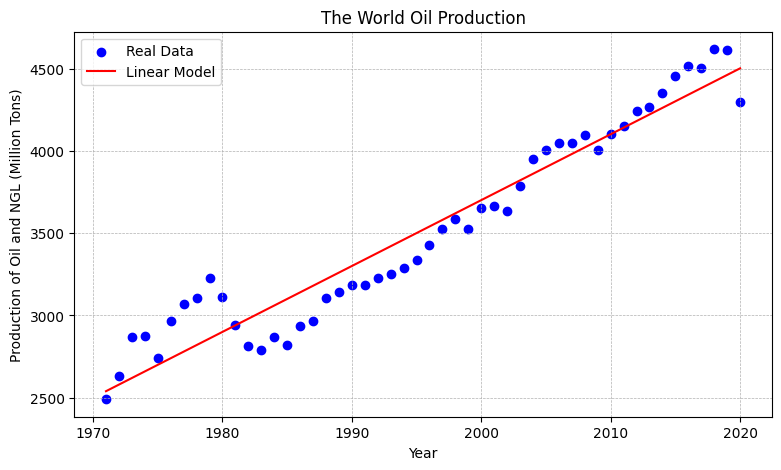

In [47]:
# Plot of the data and the corresponding Regression line
plt.figure(figsize = (9, 5))
plt.scatter(x, y, c='b', marker='o')
plt.plot(x, yhat,'r-')
plt.title('The World Oil Production')
plt.legend(["Real Data","Linear Model"])
plt.xlabel('Year')
plt.ylabel('Production of Oil and NGL (Million Tons)')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

#### __As can be seen, the linear model copies the real data with a certain error. It is a time series, so it cannot be said that $x$ (Year) causes $y$ (Oil Production) even though the correlation is close to one (0.96). It must be noted that correlation is not causality, it just describes a linear relationship between $x$ and $y$. It is evident from the data that they do not behave purely linearly, so it would be good to use a more sophisticated model, for example ARMA. This linear model is not very suitable for prediction, especially prediction in the future, i.e. extrapolation.__